In [3]:
install.packages("tidymodels")
install.packages("themis")


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RANN’, ‘ROSE’




In [13]:
install.packages("kknn")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’




In [15]:
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)

set.seed(2022)

In [16]:
weather_train <- read_csv("data/training_set2.csv")

weather_train_small <- weather_train %>%
sample_n(500) %>%
filter(Weather != "Moderate Rain") %>%
filter(Weather != "Rain Showers")

weather_train_small

glimpse(weather_train_small)


Rows: 8190 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Weather
dbl (5): Temp, Humid, Wind_Spd, Vis, Press

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Temp,Humid,Wind_Spd,Vis,Press,Weather
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
21.6,73,29,48.3,101.79,Clear
17.0,47,14,48.3,101.96,Mostly Cloudy
21.5,79,10,32.2,101.29,Clear
17.3,74,13,32.2,101.66,Mainly Clear
22.2,29,17,48.3,102.01,Mostly Cloudy
14.0,73,5,24.1,102.20,Mainly Clear
21.6,73,29,48.3,101.79,Clear
20.3,64,15,48.3,101.42,Mostly Cloudy
23.6,57,17,32.2,101.06,Mostly Cloudy


Rows: 491
Columns: 6
$ Temp     <dbl> 21.6, 17.0, 21.5, 17.3, 22.2, 14.0, 21.6, 20.3, 23.6, 15.6, 1…
$ Humid    <dbl> 73, 47, 79, 74, 29, 73, 73, 64, 57, 93, 96, 63, 91, 85, 48, 5…
$ Wind_Spd <dbl> 29, 14, 10, 13, 17, 5, 29, 15, 17, 5, 2, 13, 12, 18, 8, 10, 1…
$ Vis      <dbl> 48.3, 48.3, 32.2, 32.2, 48.3, 24.1, 48.3, 48.3, 32.2, 32.2, 1…
$ Press    <dbl> 101.79, 101.96, 101.29, 101.66, 102.01, 102.20, 101.79, 101.4…
$ Weather  <chr> "Clear", "Mostly Cloudy", "Clear", "Mainly Clear", "Mostly Cl…


In [17]:
set.seed(2022)


#check to see if proportions of data are close enough to use or if we should scale up / remove some
#of the other weather classifications

number_rows <- nrow(weather_train_small)

proportions <- weather_train_small %>%
    group_by(Weather) %>%
    summarize(n = n())
proportions

#make recipe and model with cross validation to find k

weather_recipe <- recipe(Weather ~ ., data = weather_train_small) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

weather_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

weather_vfold <- vfold_cv(weather_train_small, v = 5, strata = Weather)

k_grid <- tibble(neighbors = seq(from = 1, to = 10))

weather_fit <- workflow() %>%
    add_recipe(weather_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

#find accuracy for different values of k on our model

weather_accuracy <- weather_fit %>%
    filter(.metric == "accuracy")

#create line plot with data points for accuracy estimate vs neighbors to find optimal k value
#(looking for high accuracy estimate with high values of accuracy for nearby values of k as well)

options(repr.plot.height = 8, repr.plot.width = 12)
finding_k_plot <- ggplot(weather_accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neighbors", y = "Accuracy Estimate",
        title = "Accuracy Estimates for Different Numbers of Neighbors") +
    theme(text = element_text(size = 20)) +
    scale_x_continuous(breaks = 1:100)
#finding_k_plot

#retrain our model with the newfound value of k and fit it to our training data

weather_model <- nearest_neighbor(weight_func = "rectangular", neighbors = ...) %>%  ## must use value of k determined above
    set_engine("kknn") %>%
    set_mode("classification")

weather_fit_final <- workflow() %>%
    add_recipe(weather_recipe) %>%
    add_model(weather_model) %>%
    fit(data = weather_train_small)

#we can now use our fitted model to predict the weather for our testing data set

weather_predictions <- predict(weather_fit_final, weather_test) %>%
    bind_cols(weather_test) %>%
    select(.pred_class, Weather) %>%
#weather_predictions

#we can use the metrics function to see how accurate our model was at predicting weather values 
#on the testing dataset

weather_metrics <- weather_predictions %>%
    metrics(truth = Weather, estimate = .pred_class) %>%
    filter(.metric == "accuracy")
#weather_metrics




Weather,n
<chr>,<int>
Clear,141
Cloudy,48
Mainly Clear,111
Mostly Cloudy,101
Rain,90


ERROR: Error in set_engine(., "kknn"): '...' used in an incorrect context


In [35]:
# Balancing data classes
ups_recipe <- recipe(Weather ~ ., data = weather_train_small) %>%
    step_upsample(Weather, over_ratio = 1, skip = FALSE) %>%
    prep()

upsampled_weather <- bake(ups_recipe, weather_train_small)
    upsampled_weather %>% group_by(Weather) %>%
    summarize(n = n())

Weather,n
<fct>,<int>
Clear,141
Cloudy,141
Mainly Clear,141
Mostly Cloudy,141
Rain,141


# Forward Selection

#### Phase 1: One Predictor Variable

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6521869,5,0.015809232,Preprocessor1_Model01
2,accuracy,multiclass,0.6477765,5,0.009467097,Preprocessor1_Model02
3,accuracy,multiclass,0.5927230,5,0.008350357,Preprocessor1_Model03
4,accuracy,multiclass,0.5584080,5,0.022005802,Preprocessor1_Model04
5,accuracy,multiclass,0.5254249,5,0.014542626,Preprocessor1_Model05
7,accuracy,multiclass,0.5156505,5,0.021774001,Preprocessor1_Model07
6,accuracy,multiclass,0.5153206,5,0.019012566,Preprocessor1_Model06
8,accuracy,multiclass,0.4908650,5,0.005226031,Preprocessor1_Model08
9,accuracy,multiclass,0.4684328,5,0.005193216,Preprocessor1_Model09


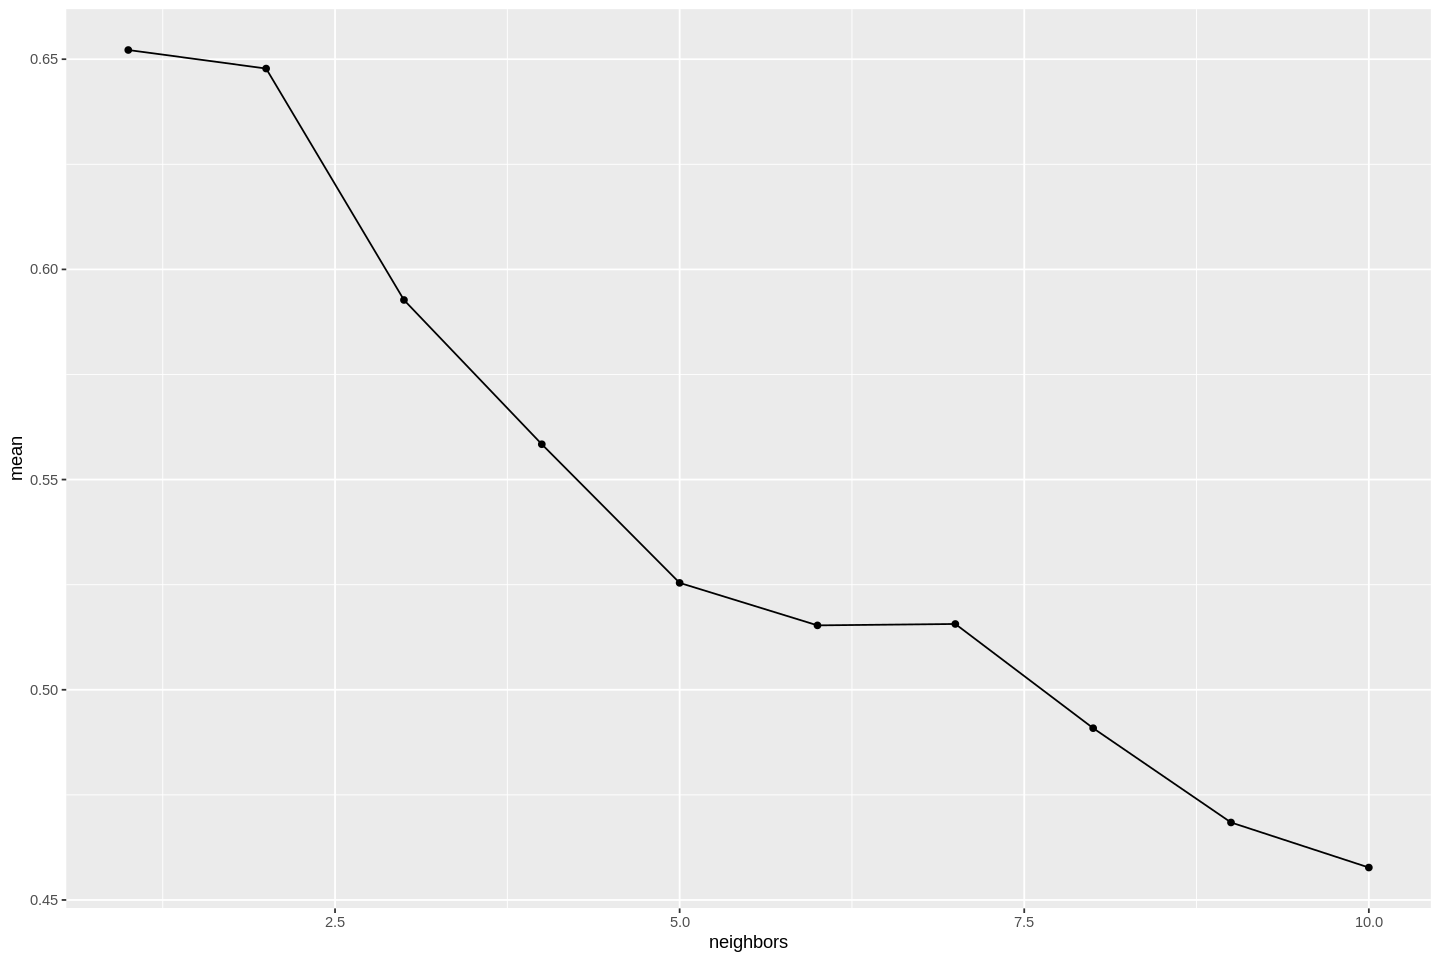

In [36]:
# Model 1 - Temperature
temp_recipe <- recipe(Weather ~ Temp, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

temp_fit <- workflow() %>%
    add_recipe(temp_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

temp_accuracy <- temp_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
temp_accuracy

temp_accuracy_plot <- temp_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
temp_accuracy_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,accuracy,multiclass,0.4537083,5,0.021588137,Preprocessor1_Model04
3,accuracy,multiclass,0.4516097,5,0.018843578,Preprocessor1_Model03
8,accuracy,multiclass,0.4376683,5,0.008652042,Preprocessor1_Model08
1,accuracy,multiclass,0.4357698,5,0.014409880,Preprocessor1_Model01
2,accuracy,multiclass,0.4234386,5,0.011896353,Preprocessor1_Model02
9,accuracy,multiclass,0.4233970,5,0.019089108,Preprocessor1_Model09
10,accuracy,multiclass,0.4210485,5,0.025705099,Preprocessor1_Model10
5,accuracy,multiclass,0.4031133,5,0.019844682,Preprocessor1_Model05
7,accuracy,multiclass,0.4029050,5,0.012242977,Preprocessor1_Model07


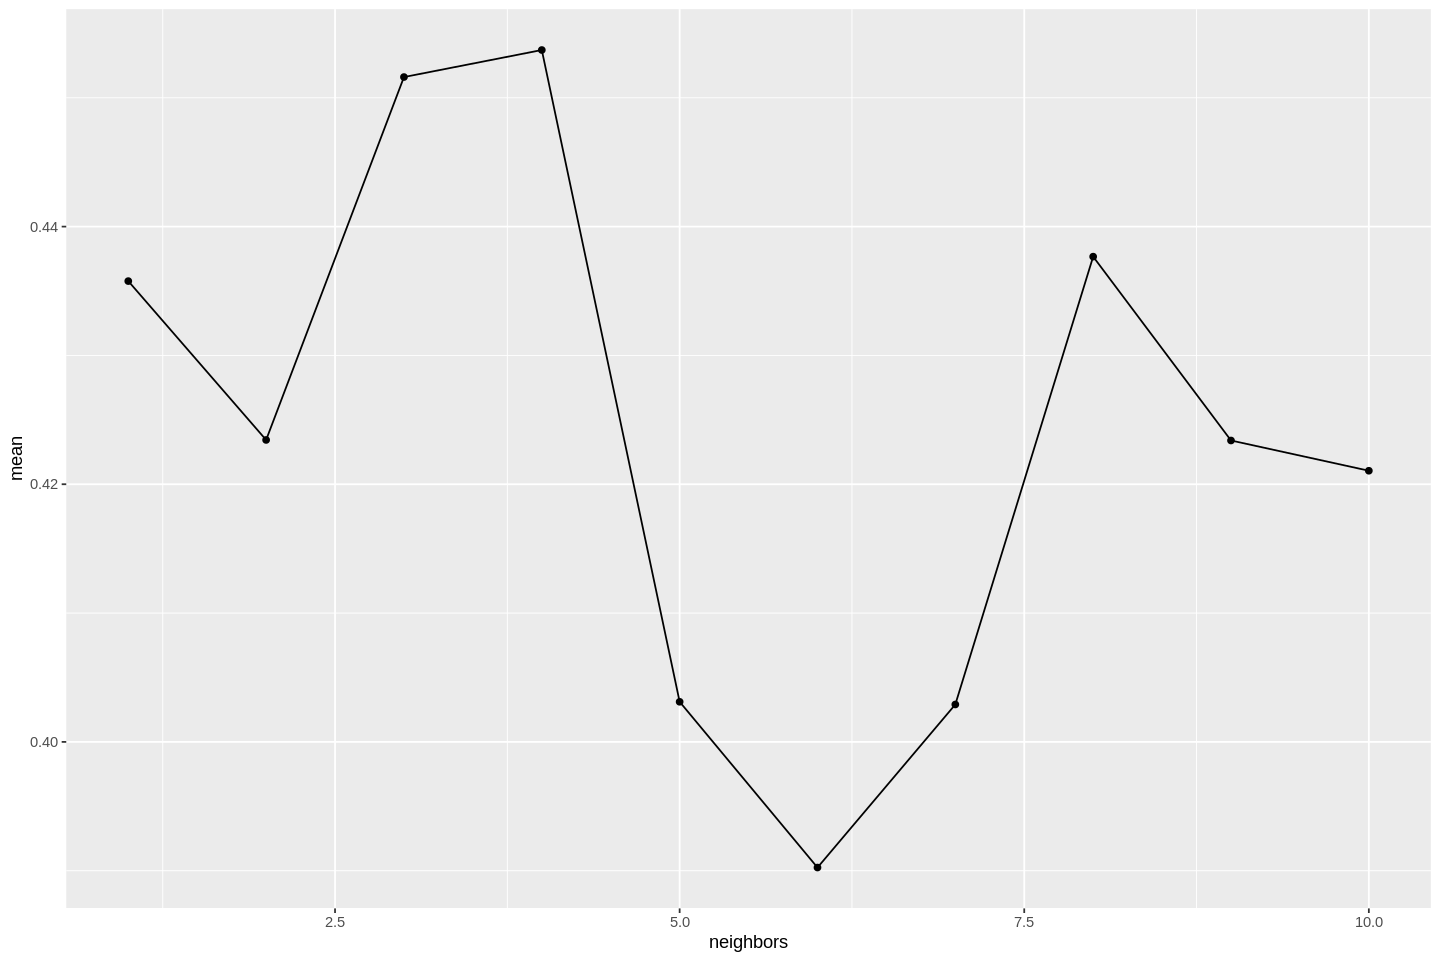

In [37]:
# Model 2 - Humidity
humid_recipe <- recipe(Weather ~ Humid, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

humid_fit <- workflow() %>%
    add_recipe(humid_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

humid_accuracy <- humid_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
humid_accuracy

humid_accuracy_plot <- humid_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
humid_accuracy_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,accuracy,multiclass,0.4213751,5,0.01825710,Preprocessor1_Model10
7,accuracy,multiclass,0.4211718,5,0.02262402,Preprocessor1_Model07
9,accuracy,multiclass,0.4170064,5,0.02922901,Preprocessor1_Model09
6,accuracy,multiclass,0.4128860,5,0.02728279,Preprocessor1_Model06
5,accuracy,multiclass,0.4128444,5,0.02588946,Preprocessor1_Model05
8,accuracy,multiclass,0.4088440,5,0.02056065,Preprocessor1_Model08
4,accuracy,multiclass,0.3781578,5,0.03800096,Preprocessor1_Model04
3,accuracy,multiclass,0.3764308,5,0.02305284,Preprocessor1_Model03
1,accuracy,multiclass,0.3314032,5,0.03520164,Preprocessor1_Model01


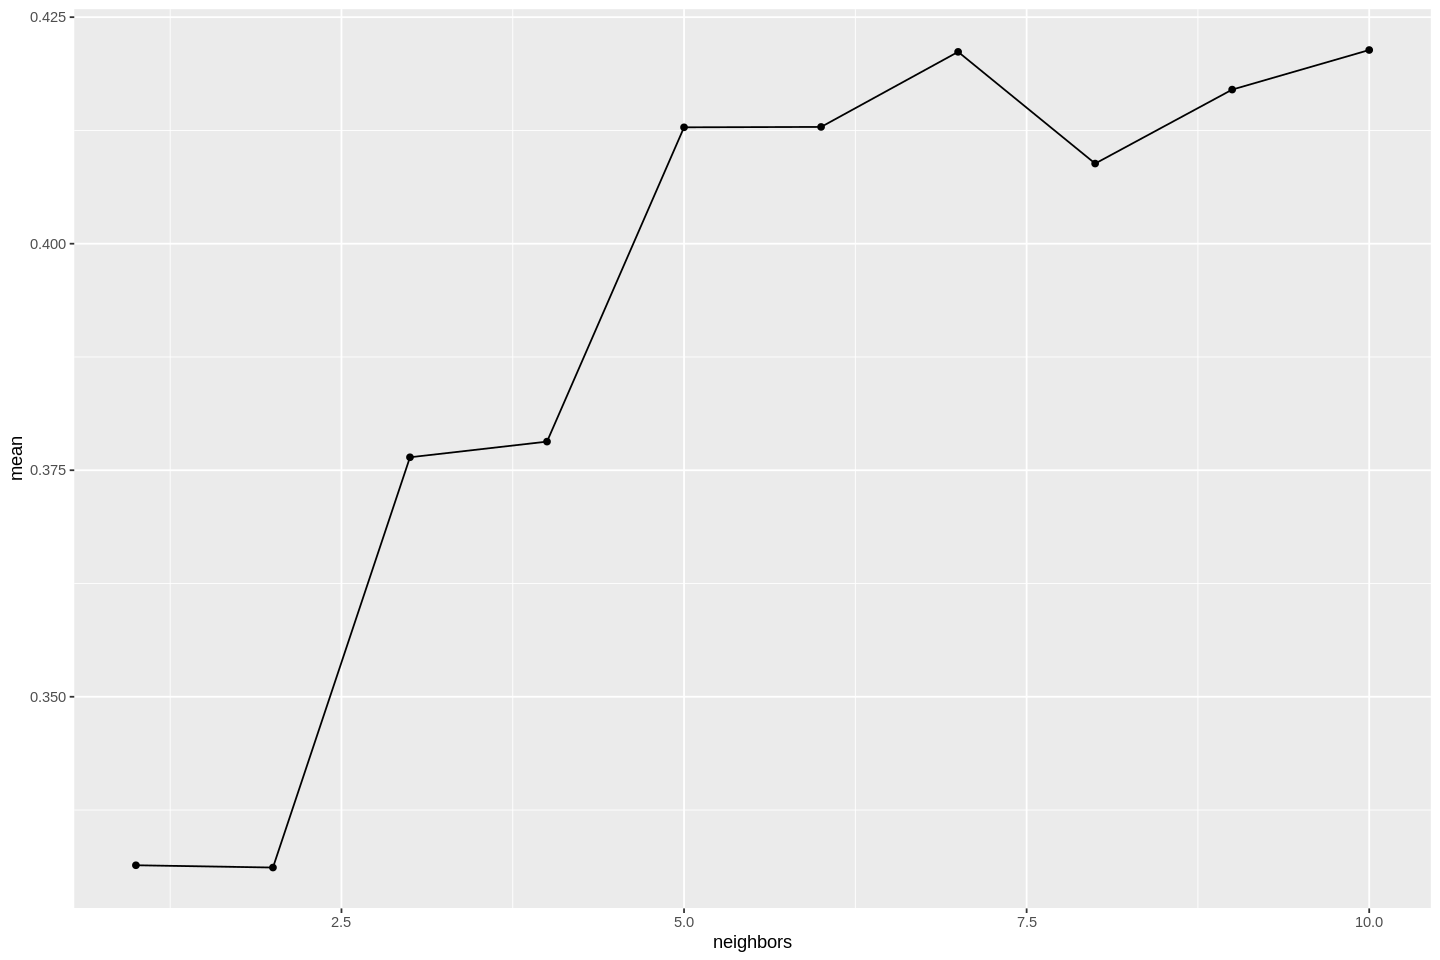

In [38]:
# Model 3 - Wind Speed
wind_recipe <- recipe(Weather ~ Wind_Spd, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

wind_fit <- workflow() %>%
    add_recipe(wind_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

wind_accuracy <- wind_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
wind_accuracy

wind_accuracy_plot <- wind_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
wind_accuracy_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,accuracy,multiclass,0.3152317,5,0.018330997,Preprocessor1_Model03
7,accuracy,multiclass,0.3114747,5,0.014442958,Preprocessor1_Model07
8,accuracy,multiclass,0.3113946,5,0.007680318,Preprocessor1_Model08
10,accuracy,multiclass,0.3072709,5,0.010080279,Preprocessor1_Model10
9,accuracy,multiclass,0.3011687,5,0.009756348,Preprocessor1_Model09
5,accuracy,multiclass,0.2990652,5,0.017218550,Preprocessor1_Model05
6,accuracy,multiclass,0.2970033,5,0.012753948,Preprocessor1_Model06
4,accuracy,multiclass,0.2948198,5,0.017306837,Preprocessor1_Model04
1,accuracy,multiclass,0.2946132,5,0.024263278,Preprocessor1_Model01


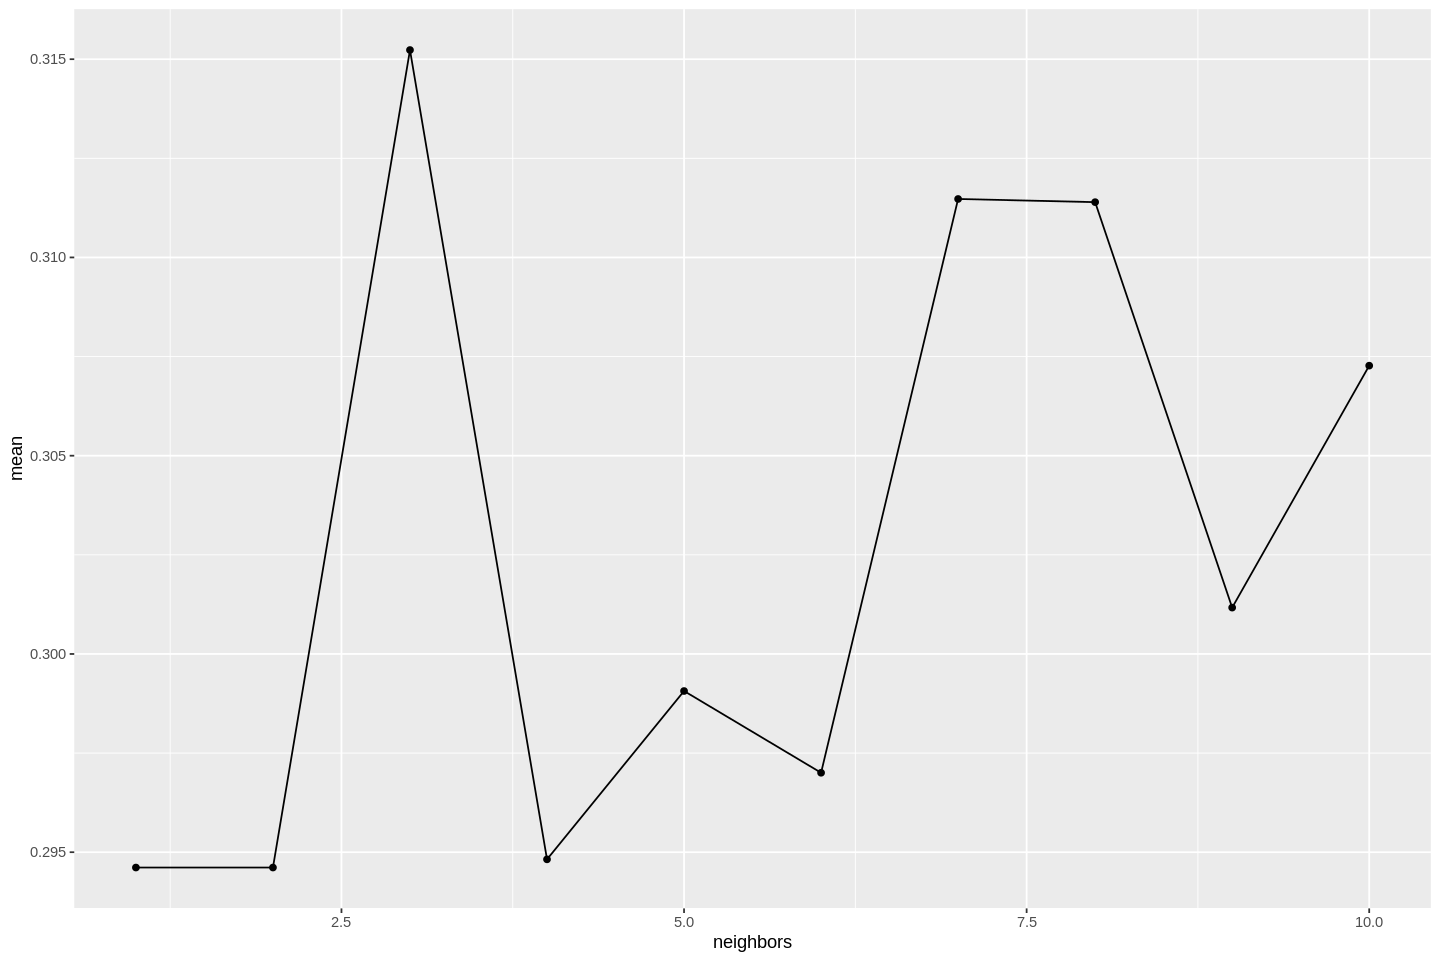

In [39]:
# Model 4 - Visability
vis_recipe <- recipe(Weather ~ Vis, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

vis_fit <- workflow() %>%
    add_recipe(vis_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

vis_accuracy <- vis_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
vis_accuracy

vis_accuracy_plot <- vis_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
vis_accuracy_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.6087679,5,0.010887350,Preprocessor1_Model02
1,accuracy,multiclass,0.6052591,5,0.012006266,Preprocessor1_Model01
3,accuracy,multiclass,0.5967234,5,0.018043562,Preprocessor1_Model03
4,accuracy,multiclass,0.5720195,5,0.022152660,Preprocessor1_Model04
6,accuracy,multiclass,0.5622484,5,0.009697050,Preprocessor1_Model06
5,accuracy,multiclass,0.5620434,5,0.006770298,Preprocessor1_Model05
7,accuracy,multiclass,0.5354059,5,0.011411486,Preprocessor1_Model07
9,accuracy,multiclass,0.5208946,5,0.023246680,Preprocessor1_Model09
8,accuracy,multiclass,0.5108303,5,0.022402422,Preprocessor1_Model08


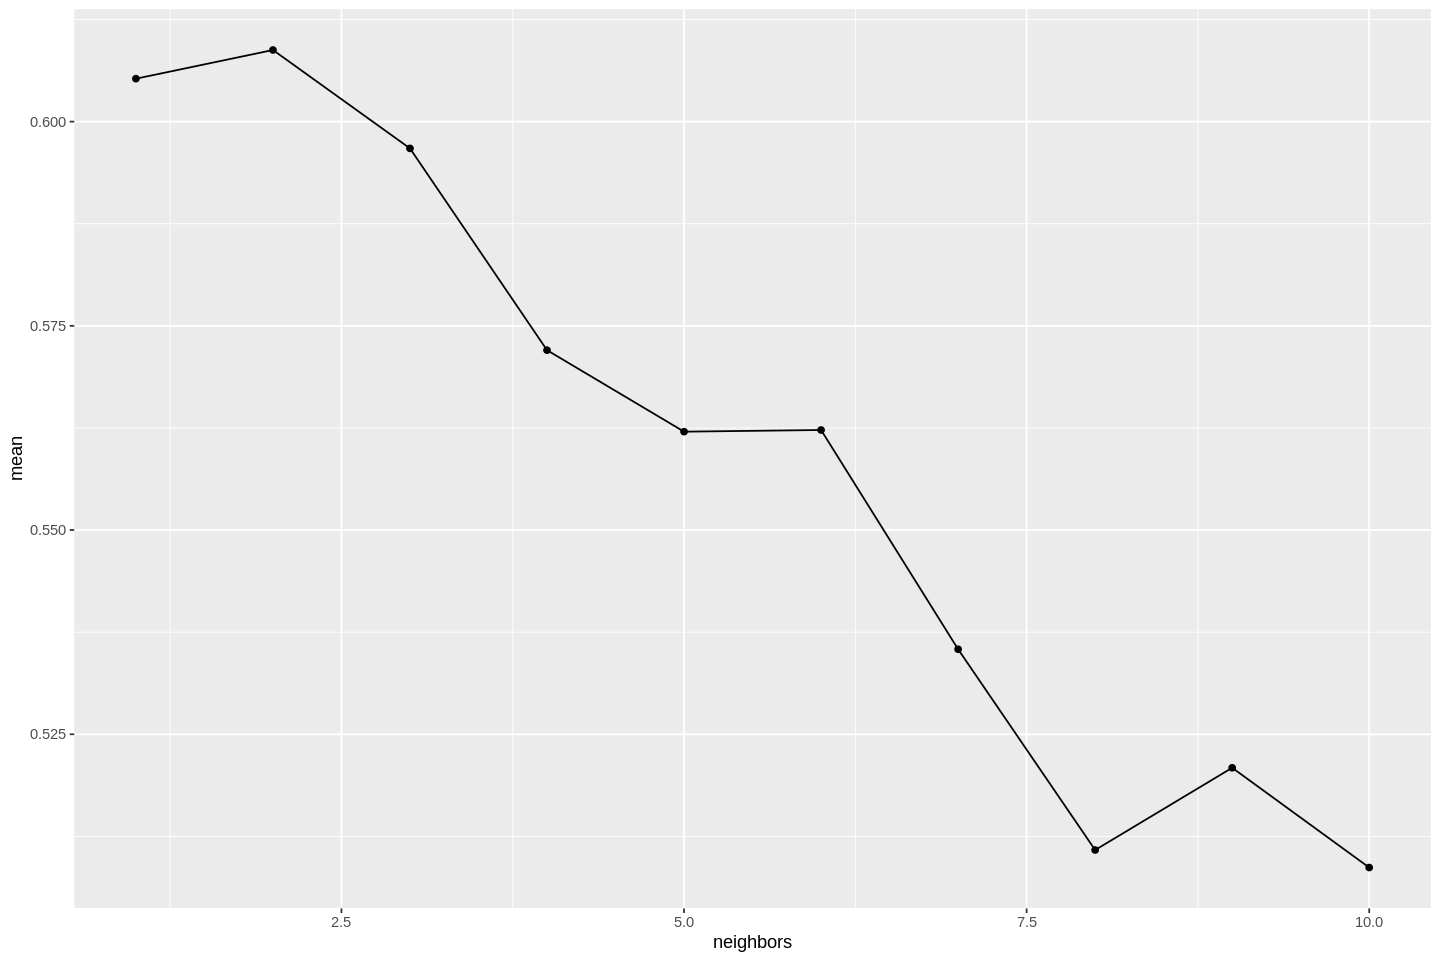

In [40]:
# Model 5 - Air Pressure
press_recipe <- recipe(Weather ~ Press, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

press_fit <- workflow() %>%
    add_recipe(press_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

press_accuracy <- press_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
press_accuracy

press_accuracy_plot <- press_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
press_accuracy_plot

**Findings: Temperature has the highest prediction accuracy.** 

#### Phase 2: Two Predictor Variables

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8660522,5,0.01458874,Preprocessor1_Model01
2,accuracy,multiclass,0.8660522,5,0.01458874,Preprocessor1_Model02
3,accuracy,multiclass,0.7027534,5,0.01258041,Preprocessor1_Model03
4,accuracy,multiclass,0.6659249,5,0.01066003,Preprocessor1_Model04
5,accuracy,multiclass,0.5886393,5,0.01422746,Preprocessor1_Model05
6,accuracy,multiclass,0.5680224,5,0.01320111,Preprocessor1_Model06
7,accuracy,multiclass,0.5233581,5,0.01618803,Preprocessor1_Model07
8,accuracy,multiclass,0.5212162,5,0.01603392,Preprocessor1_Model08
9,accuracy,multiclass,0.5210946,5,0.01784633,Preprocessor1_Model09


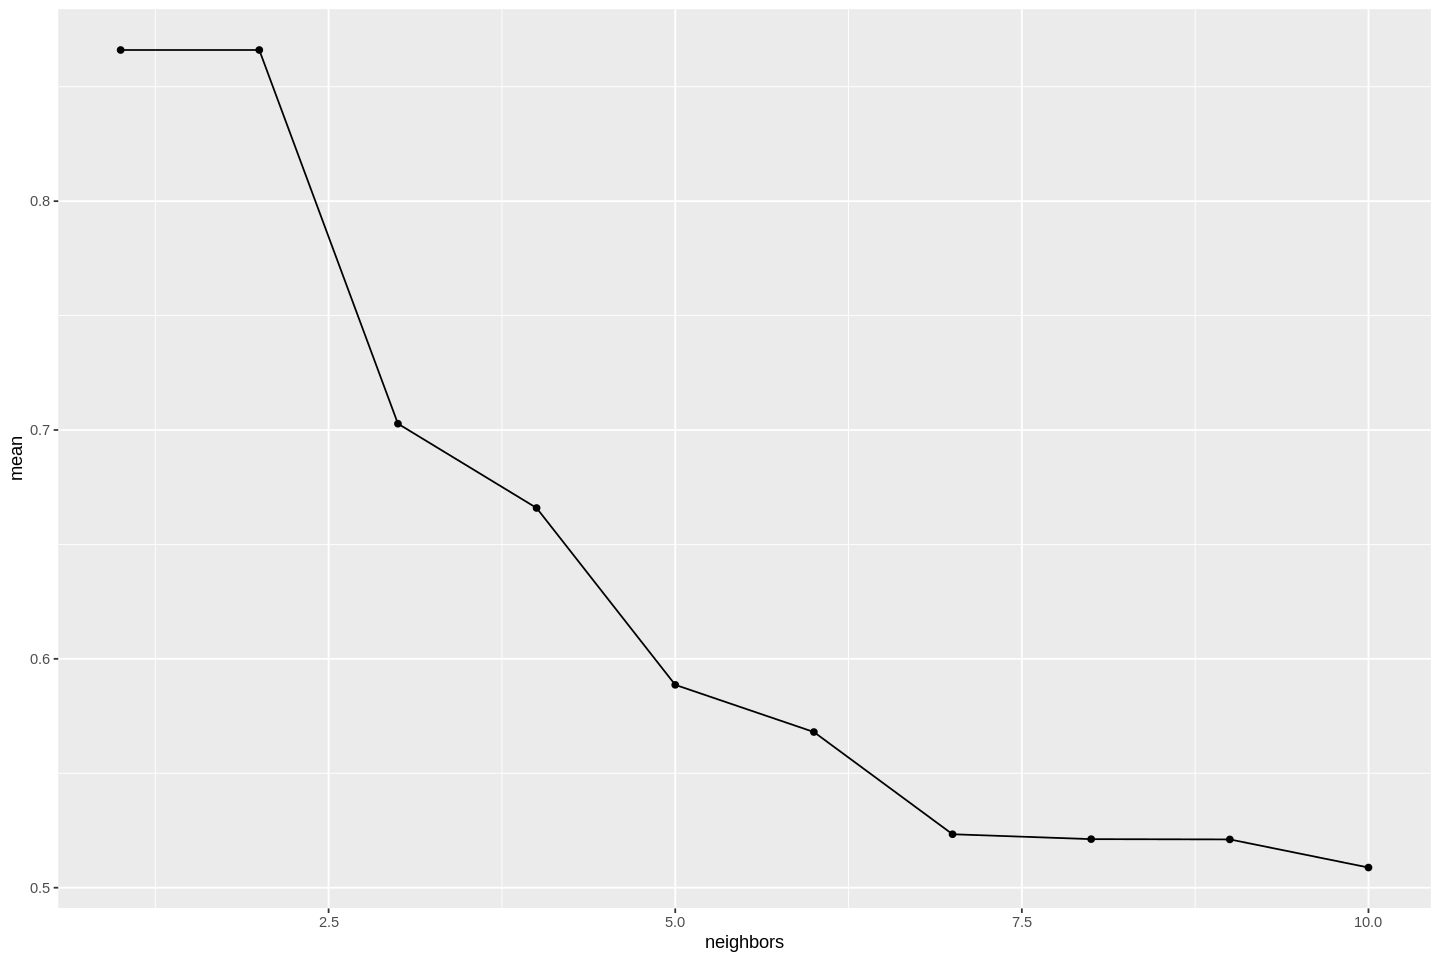

In [41]:
# Model 1.1 - Temperature + Humidity
humid2_recipe <- recipe(Weather ~ Temp + Humid, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

humid2_fit <- workflow() %>%
    add_recipe(humid2_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

humid2_accuracy <- humid2_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
humid2_accuracy

humid2_accuracy_plot <- humid2_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
humid2_accuracy_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8435367,5,0.011295149,Preprocessor1_Model01
2,accuracy,multiclass,0.8434551,5,0.009172816,Preprocessor1_Model02
3,accuracy,multiclass,0.6760709,5,0.008116998,Preprocessor1_Model03
4,accuracy,multiclass,0.6311217,5,0.011531584,Preprocessor1_Model04
5,accuracy,multiclass,0.5884826,5,0.013037453,Preprocessor1_Model05
6,accuracy,multiclass,0.5664971,5,0.011094211,Preprocessor1_Model06
9,accuracy,multiclass,0.5293437,5,0.011326920,Preprocessor1_Model09
8,accuracy,multiclass,0.5234431,5,0.008847528,Preprocessor1_Model08
10,accuracy,multiclass,0.5191193,5,0.015409266,Preprocessor1_Model10


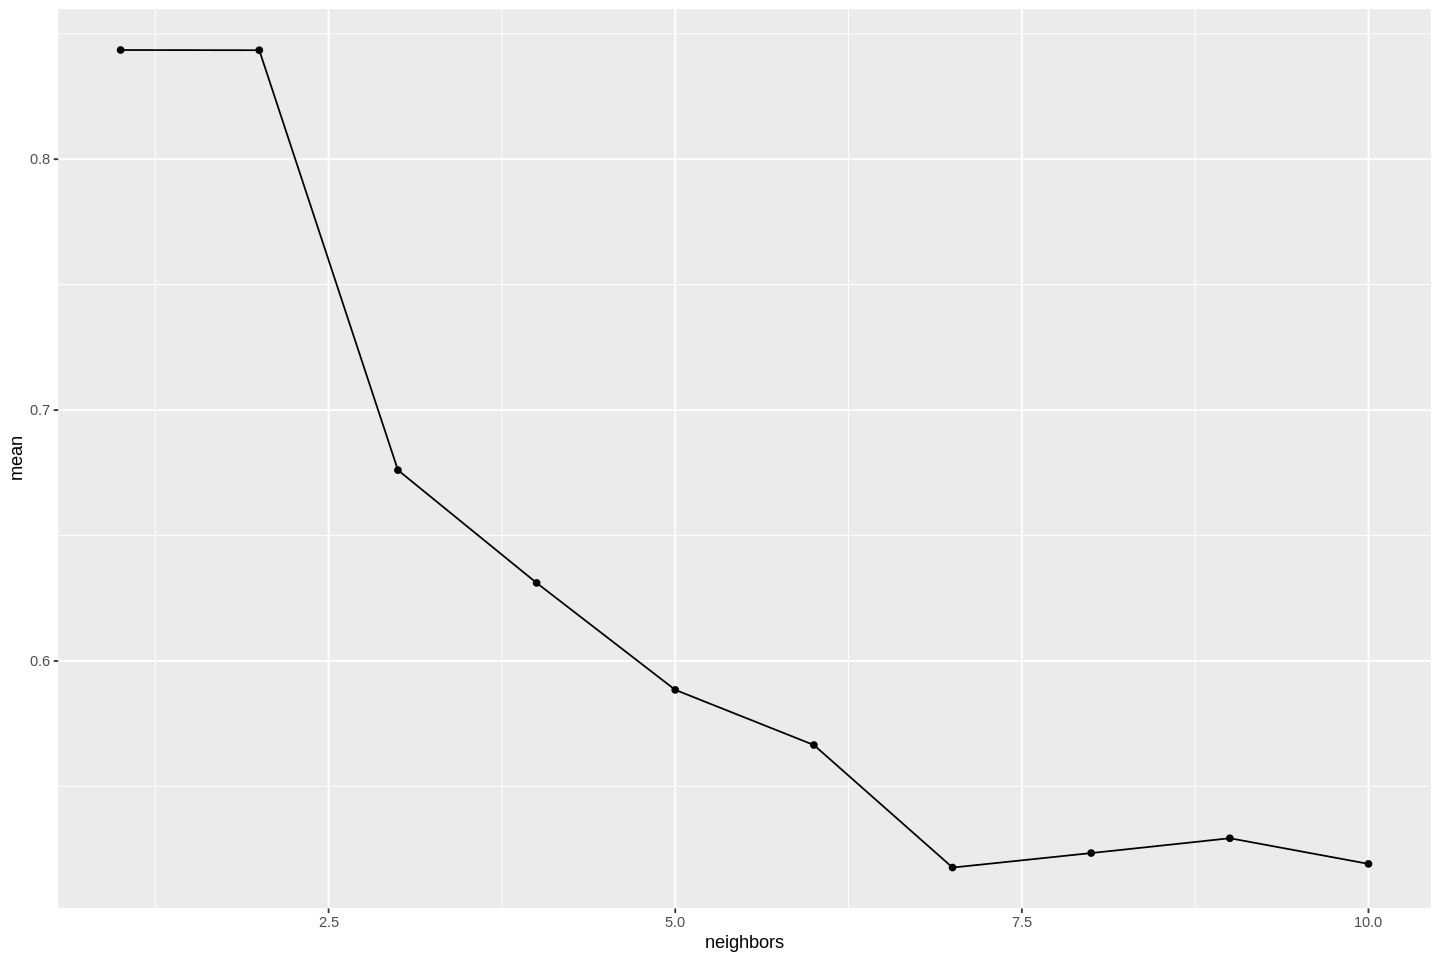

In [44]:
# Model 2.1 - Temperature + Wind Speed
wind2_recipe <- recipe(Weather ~ Temp + Wind_Spd, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

wind2_fit <- workflow() %>%
    add_recipe(wind2_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

wind2_accuracy <- wind2_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
wind2_accuracy

wind2_accuracy_plot <- wind2_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
wind2_accuracy_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.7902168,5,0.006752414,Preprocessor1_Model02
1,accuracy,multiclass,0.7820926,5,0.006546036,Preprocessor1_Model01
3,accuracy,multiclass,0.7004049,5,0.017301657,Preprocessor1_Model03
4,accuracy,multiclass,0.6679068,5,0.014394895,Preprocessor1_Model04
5,accuracy,multiclass,0.6064627,5,0.019625652,Preprocessor1_Model05
6,accuracy,multiclass,0.5822904,5,0.020723463,Preprocessor1_Model06
9,accuracy,multiclass,0.5370995,5,0.026797078,Preprocessor1_Model09
7,accuracy,multiclass,0.5294670,5,0.013972502,Preprocessor1_Model07
8,accuracy,multiclass,0.5252632,5,0.019821464,Preprocessor1_Model08


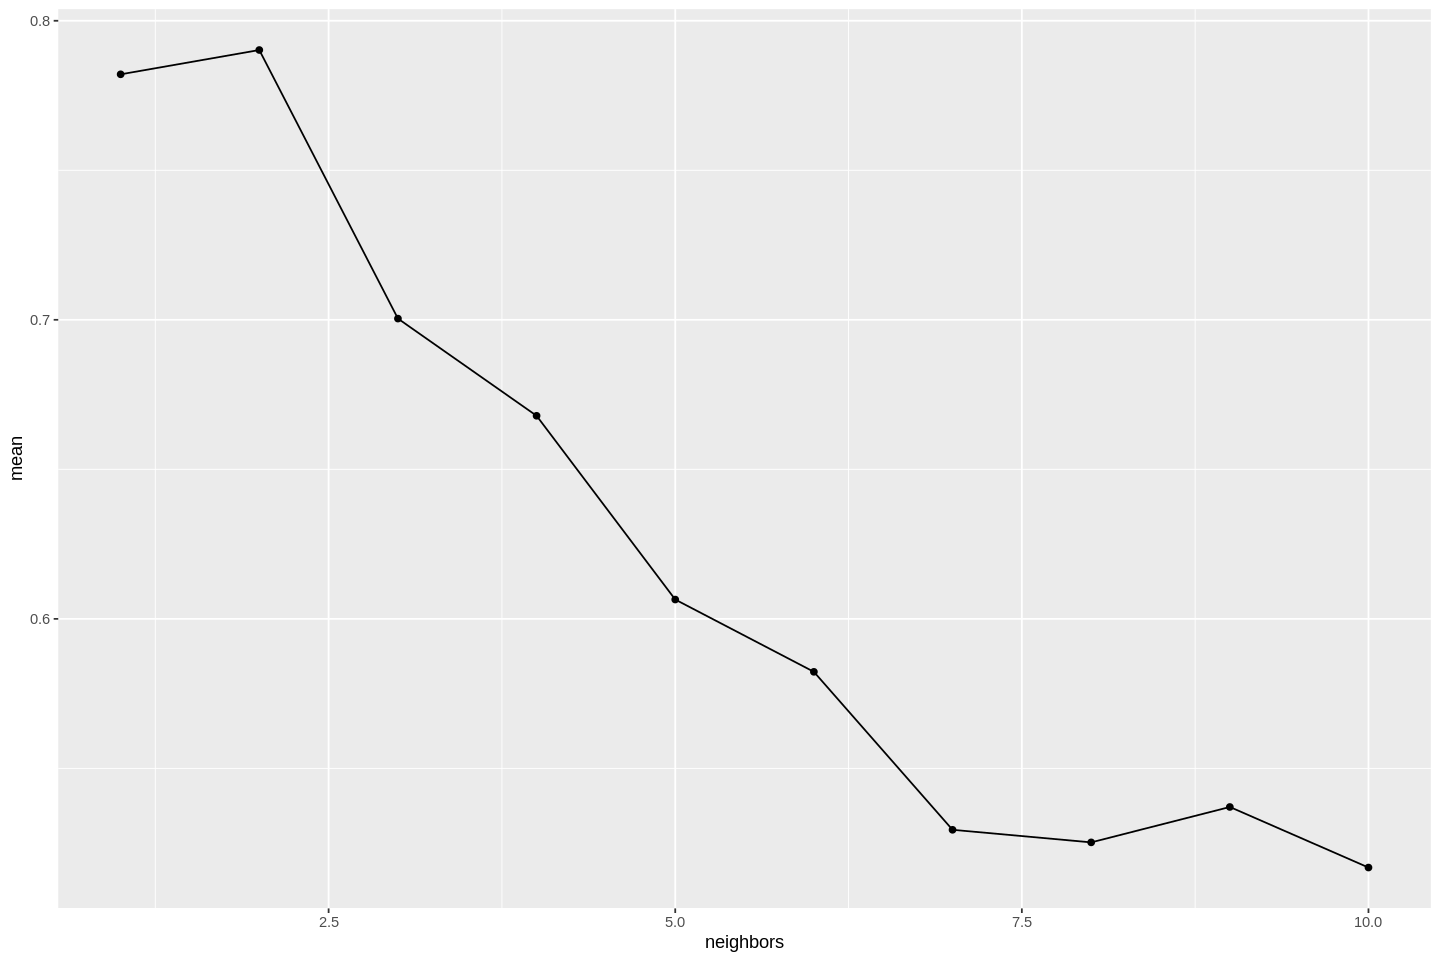

In [45]:
# Model 3.1 - Temperature + Visability
vis2_recipe <- recipe(Weather ~ Temp + Vis, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

vis2_fit <- workflow() %>%
    add_recipe(vis2_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

vis2_accuracy <- vis2_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
vis2_accuracy

vis2_accuracy_plot <- vis2_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
vis2_accuracy_plot

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8577247,5,0.01614096,Preprocessor1_Model01
2,accuracy,multiclass,0.8577247,5,0.01614096,Preprocessor1_Model02
3,accuracy,multiclass,0.6858053,5,0.01810383,Preprocessor1_Model03
4,accuracy,multiclass,0.6532272,5,0.01692780,Preprocessor1_Model04
5,accuracy,multiclass,0.5967283,5,0.01108473,Preprocessor1_Model05
6,accuracy,multiclass,0.5865024,5,0.01307097,Preprocessor1_Model06
7,accuracy,multiclass,0.5699675,5,0.01635285,Preprocessor1_Model07
8,accuracy,multiclass,0.5639853,5,0.01051989,Preprocessor1_Model08
9,accuracy,multiclass,0.5418365,5,0.01017088,Preprocessor1_Model09


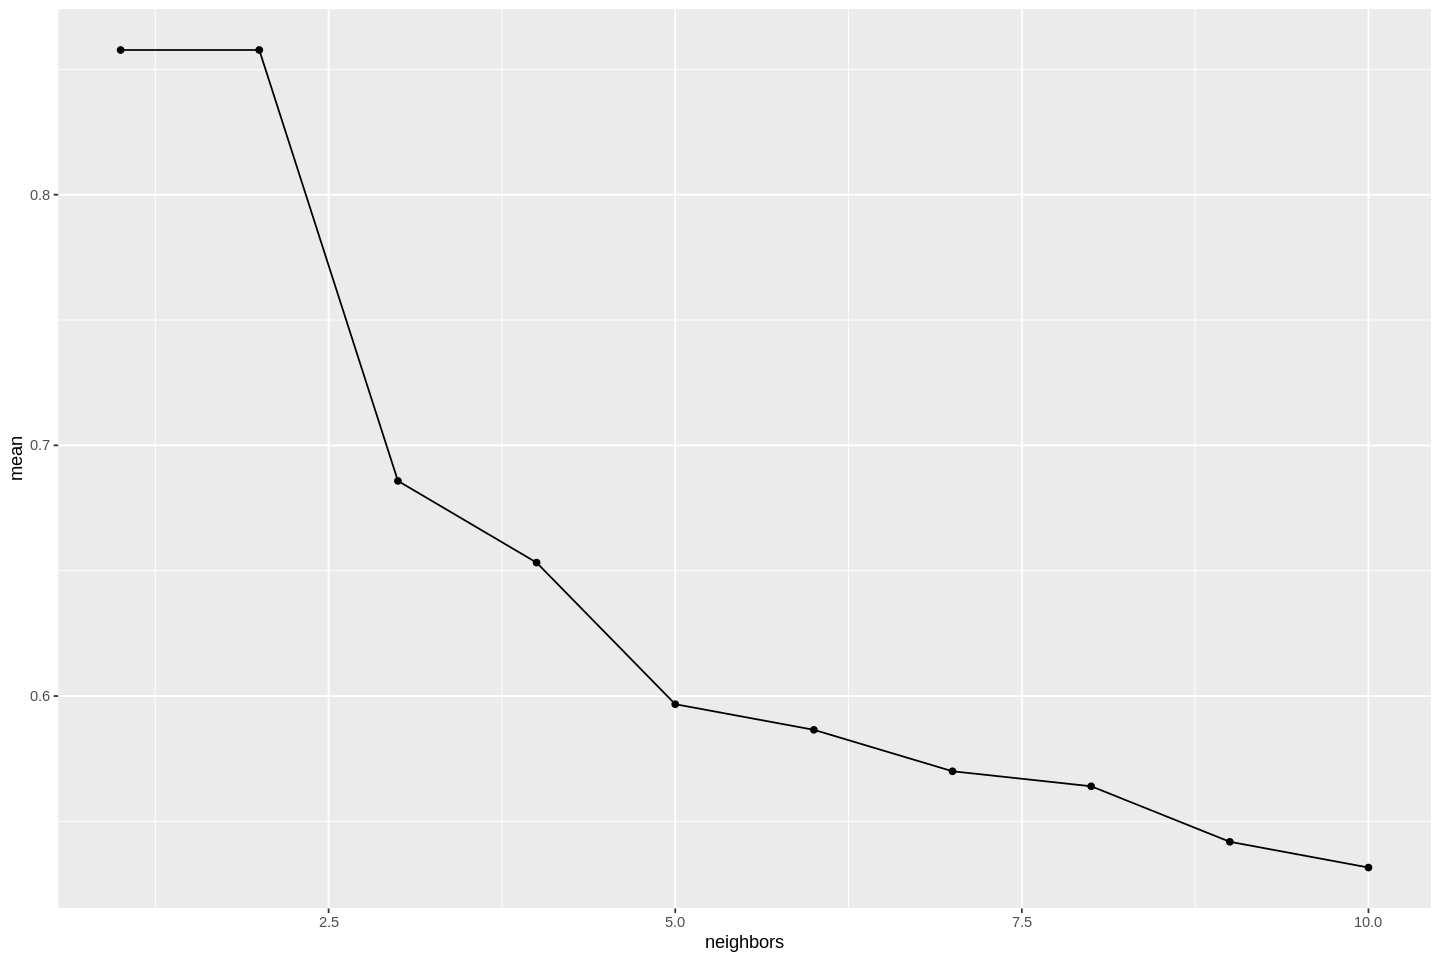

In [46]:
# Model 4.1 - Temperature + Air Pressure
press2_recipe <- recipe(Weather ~ Temp + Press, data = upsampled_weather) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

press2_fit <- workflow() %>%
    add_recipe(press2_recipe) %>%
    add_model(weather_knn) %>%
    tune_grid(resamples = weather_vfold, grid = k_grid) %>%
    collect_metrics()

press2_accuracy <- press2_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(-mean)
press2_accuracy

press2_accuracy_plot <- press2_accuracy %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() + 
    geom_line()
press2_accuracy_plot